In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize']=(20,10) 

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# drop unwanted columns
df=df.drop(['area_type', 'availability','society'],axis=1,)
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Data Cleaning: Handle NA values

In [7]:
df.isnull().sum()                      
#df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df["balcony"].fillna(df["balcony"].mean(), inplace=True)
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [9]:
df=df.dropna()
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df.shape

(13246, 6)

In [11]:
df.groupby('balcony')['balcony'].agg('count')

balcony
0.000000    1029
1.000000    4897
1.584376     536
2.000000    5112
3.000000    1672
Name: balcony, dtype: int64

In [12]:
df["balcony"] = df["balcony"].apply(int)
df.groupby('balcony')['balcony'].agg('count')

balcony
0    1029
1    5433
2    5112
3    1672
Name: balcony, dtype: int64

In [13]:
# there has 2 different word for same word(Bedroom, BHK)
# also here count of bedroom in character type 

df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# there BHK and Bedroom are equal

df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df[df.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0,660.0,43


In [16]:
# there have 43 & 27 bedrooms
# there are some kind of outliers. we handel oultlier later(43 bedrooms in 2400sqft)

In [17]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# "total_sqft" should be float, but here it is string ('1440', '1133 - 1384')

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
            

In [20]:
df[~df['total_sqft'].apply(is_float)].head(10)  

# df[df['total_sqft'].apply(is_float)].head()    without ~ its in only valuse

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,1,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0,445.000,4


In [21]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2 
    try:
        return float(x)
    except:
        return None

In [22]:
convert_sqft_to_num('2842')        # return float number

2842.0

In [23]:
convert_sqft_to_num("2100 - 2850")        # return average value

2475.0

In [24]:
convert_sqft_to_num("34.46Sq. Meter")          # drop this kind of values

In [25]:
df_2=df.copy()
df_2['total_sqft']=df_2['total_sqft'].apply(convert_sqft_to_num)
df_2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2


In [26]:
df.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
balcony                 0
price               186.0
bhk                     4
Name: 30, dtype: object

In [27]:
df_2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony               0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering

In [28]:
df_3=df_2.copy()
df_3["price_per_sqft"]=(df_3["price"]*100000)/df_3["total_sqft"]
df_3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000


In [29]:
df_3['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [30]:
df_3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [31]:
len(df_3.location.unique())

1304

In [32]:
# This is high dimensionality problem, Therefore we should apply dimensionality reduction techniques to reduce dimention
# some Location data points has only one or two data points

In [33]:
df_3.location=df_3.location.apply(lambda x: x.strip())
location_stats=df_3.groupby('location')['location'].agg('count')
location_stats[0:20]

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 25
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [34]:
df_3.location=df_3.location.apply(lambda x: x.strip())
location_stats=df_3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [35]:
location_stats.values.sum()

13246

In [36]:
len(location_stats)

1293

In [37]:
len(location_stats[location_stats>=10])

254

In [38]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [39]:
# apply "others" which location stats less than 10

df_3.location=df_3.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
df_3.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,1,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,1,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,1,370.00,6,36274.509804


## Outlier Removal Using Business Logic

In [40]:
# Here we divide "total_sqft" by the "bhk", then check the value
# we think minimum size of bedroom is 300sqft

In [41]:
df_3[df_3.total_sqft/df_3.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,1,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,1,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,2,100.0,3,20000.000000


In [42]:
len(df_3[df_3.total_sqft/df_3.bhk<300])

744

In [43]:
df_3.shape

(13246, 8)

In [44]:
df=df_3[~(df_3.total_sqft/df_3.bhk<300)]          # ~ filter
df.shape

(12502, 8)

In [45]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## Outlier Removal Using bhk

In [46]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        
        reduced_df=subdf[(subdf.price_per_sqft>=(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df=remove_pps_outliers(df)
df.shape 

(10241, 8)

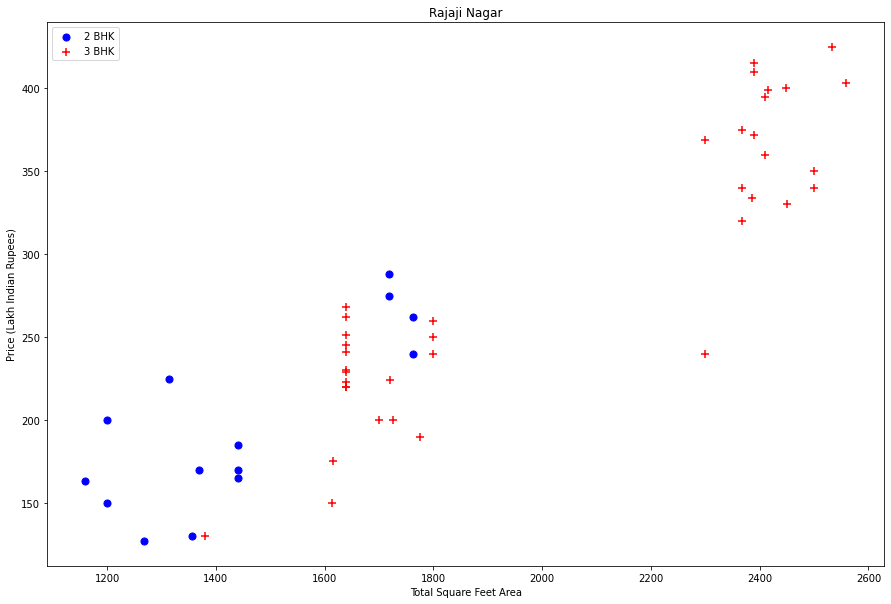

In [47]:
# Drow scatter plot for compare prices between 2 BHK and 3BHK

def plot_scatter_chart(df,location):
    
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 BHK', s=50,marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,'Rajaji Nagar')   

In [48]:
# here we can see 3 BHk unique price is less than 2 BHK price in around 1600-1800 total sq ft in same location

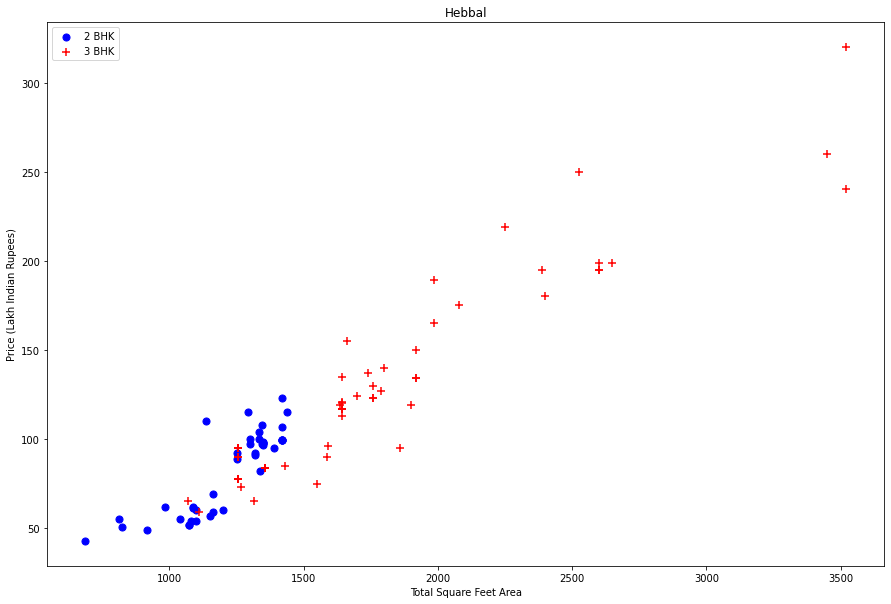

In [49]:
plot_scatter_chart(df,'Hebbal')

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7329, 8)

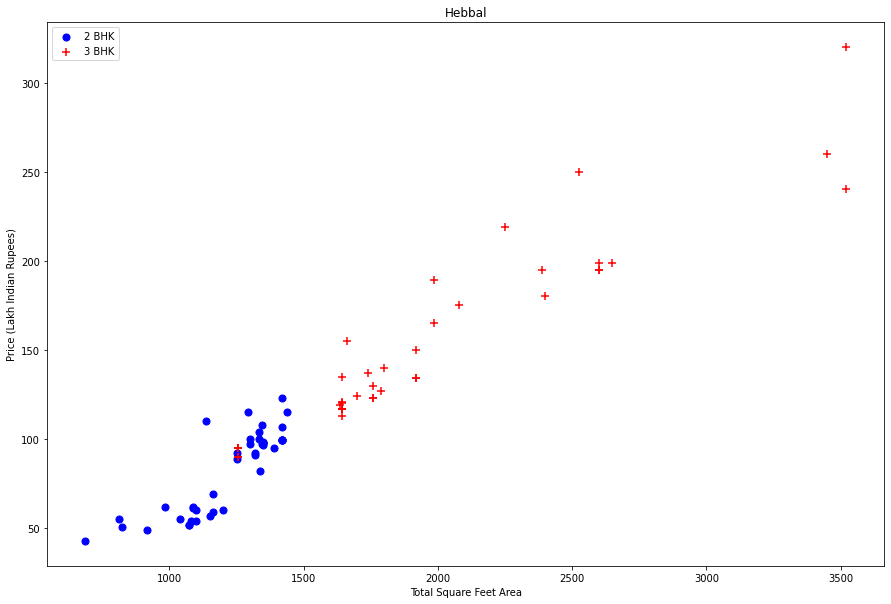

In [51]:
plot_scatter_chart(df,'Hebbal')

Text(0, 0.5, 'Count')

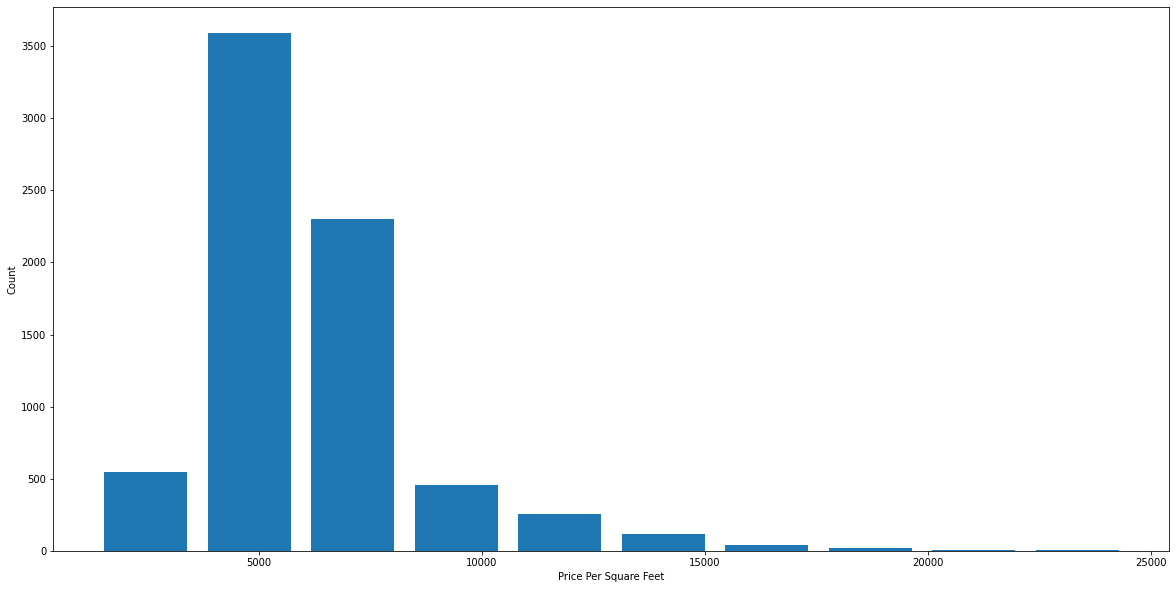

In [52]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## Outlier Removal Using Bathrooms Feature

In [53]:
# Some houses only have 2 bedrooms, but they have more than 4, 5 bathrooms, and we think it's outlier.

In [54]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [55]:
df[df.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,1,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,1,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,1,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,1,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

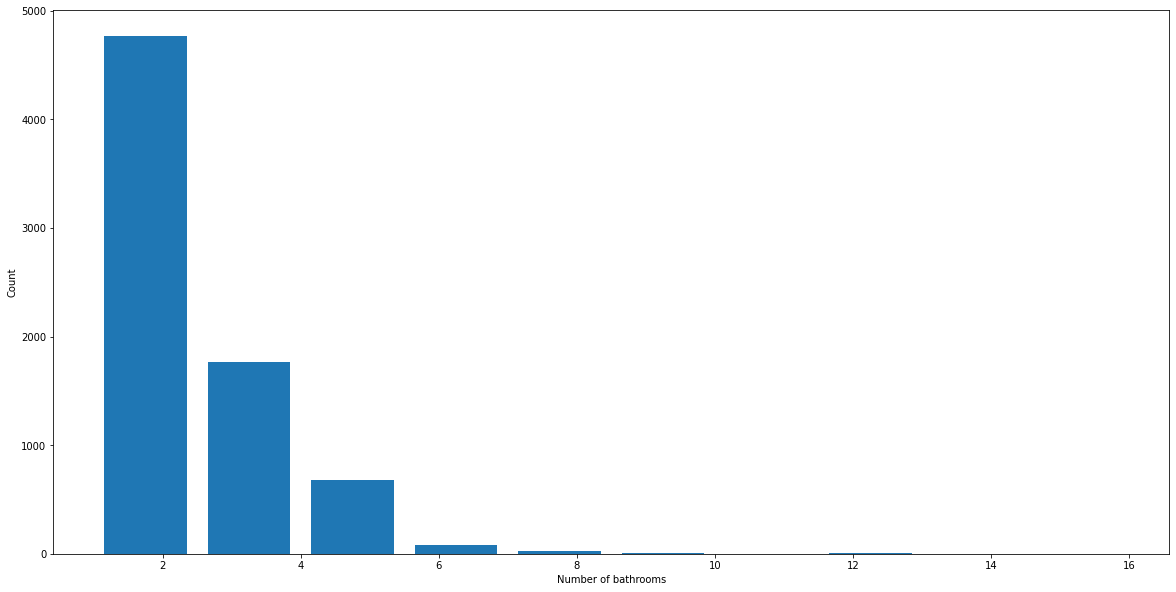

In [56]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [57]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,2,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,1,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,2,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1,1000.0,6,8819.897689


In [58]:
df=df[df.bath<df.bhk+2]
df.shape

(7251, 8)

In [59]:
# drop unwated columns

df=df.drop(['size','price_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2,148.0,2


## Use One Hot Encoding For Location

In [60]:
dummies=pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df = pd.concat([df,dummies.drop('others',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df = df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build model now

In [63]:
X=df.drop('price',axis='columns')
y=df.price

In [64]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8453922116502841

## K Fold cross validation

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82418349, 0.77166436, 0.85109673, 0.80867881, 0.83591746])

## GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_Forest' : {
            'model': RandomForestRegressor(),
            'params': {
                "n_estimators":[100,200,300,400,500]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.818308,{'normalize': False}
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.701672,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,Random_Forest,0.780337,{'n_estimators': 300}


**Linear Regression gives the best score!**

In [70]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [71]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

4

## Testing the model

In [72]:
def predict_price(location,sqft,bath,bhk, balcony):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [73]:
predict_price("1st Phase JP Nagar",1000, 2, 2, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


84.53797245868502

In [74]:
predict_price("1st Phase JP Nagar",1000, 3, 3, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.93580434131813

In [75]:
predict_price('Indira Nagar',1000, 2, 2, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


182.34836858419948

In [76]:
predict_price('Indira Nagar',1000, 3, 3, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


184.7462004668326

## Export the model

In [77]:
# save the best model
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information for use later

In [78]:
# columns informations

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))